# Netflix Customer Churn

## Before the analysis
### Intro
THe project conducts an Exploratory Data Analysis,  actively utilizing machine learning for predictive insights, concluding insights and making suggests on actions. 

### Acknowledgements
The dataset is acquired at: [Kaggle-Netflix Customer Churn dataset](https://www.kaggle.com/datasets/abdulwadood11220/netflix-customer-churn-dataset)

### Import

In [49]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('netflix_customer_churn.csv')
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

1. Endgame
   1. churned
2. Product Info
   1. subscription_type 
   2. monthly_fee
3. User demographic
   1. age
   2. gender
   3. region
   4. device
4. User behavior
   1. watch_hours 
   2. last_login_days
   3. payment_method
   4. number_of_profiles
   5. avg_watch_time_per_day
   6. favorite_genre

## EDA - Exploratory Data Analysis

### Endgame
Related columns:
- `churned` 

The churned users and active users are almost even in this dataset. 

In [5]:
df['churned'].value_counts()

churned
1    2515
0    2485
Name: count, dtype: int64

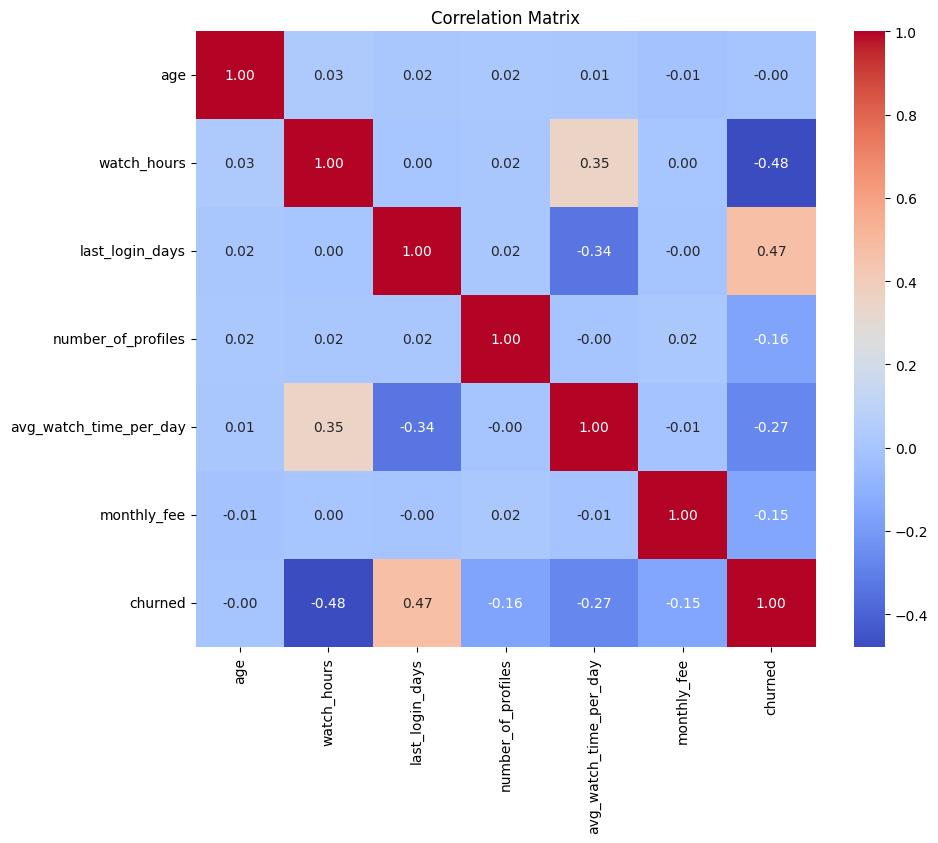

In [6]:
# correlation matrix for continuous variables
vars = ['age', 'watch_hours', 'last_login_days', 'number_of_profiles', 'avg_watch_time_per_day', 'monthly_fee', 'churned']
plt.figure(figsize=(10,8))
corr = df[vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Highlighting correlations:
- **last login days with avg watch time per day (-0.34):** The negative correlation can be explained that if a user has a longer period of time since their log in, the user will have a lower average on the watch time per day
- **average watch time per day with watch hours (0.35):** Does not come with suprise
- **churned with watch hours (-0.48):** I was expecting a stronger correlation between churn and average watch time per day than total watch hours, as I imagine the users didn't form a habit of using Netflix and churned. But according to the data, it seems that users are more likely to churn because the total hours devoted into Netflix series aren't high enough. 
- **churned with last login days (0.47):** Does not come with surpise. It only become a matter of time for the users that didn't login in for a long time, that they should cancel the subscription.

### Product Info
**Related columns:**
- `subscription_type`
- `monthly_fee`
> Info extracted from: [Netflix](https://help.netflix.com/en/node/24926). The actual monthly cost is different from the `monthly_fee` column indicated by the dataset, maybe due to the dataset's outdated data source.
- **Basic:** i.e. Standard with Ads
  - Pricing: $7.99/month
- **Standard**:
  - Pricing: $17.99/month
- **Premium**: 
  - Feature: watch on 4 supported devices & better picture and audio quality
  - Pricing: $24.99/month

The users are evenly distributed across the three subscription types.

In [7]:
df['subscription_type'] = df['subscription_type'].replace({'Basic': "0 Basic", 'Standard': "1 Standard", 'Premium': "2 Premium"})

In [8]:
df[['subscription_type', 'monthly_fee']]\
    .drop_duplicates()\
    .sort_values(by='subscription_type')\
    .reset_index(drop=True)

,subscription_type,monthly_fee
0,0 Basic,8.99
1,1 Standard,13.99
2,2 Premium,17.99


In [9]:
df['subscription_type']\
    .value_counts()\
    .reset_index()\
    .sort_values("subscription_type")

,subscription_type,count
1,0 Basic,1661
2,1 Standard,1646
0,2 Premium,1693


### User Demographic
**Related columns:**
- `age`
- `gender`
- `region`
- `device`

In [10]:
df['age_bucket'] = pd.cut(df['age'], 
                    bins=[18, 25, 35, 45, 55, 65, 100], 
                    labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'],
                    right=False)

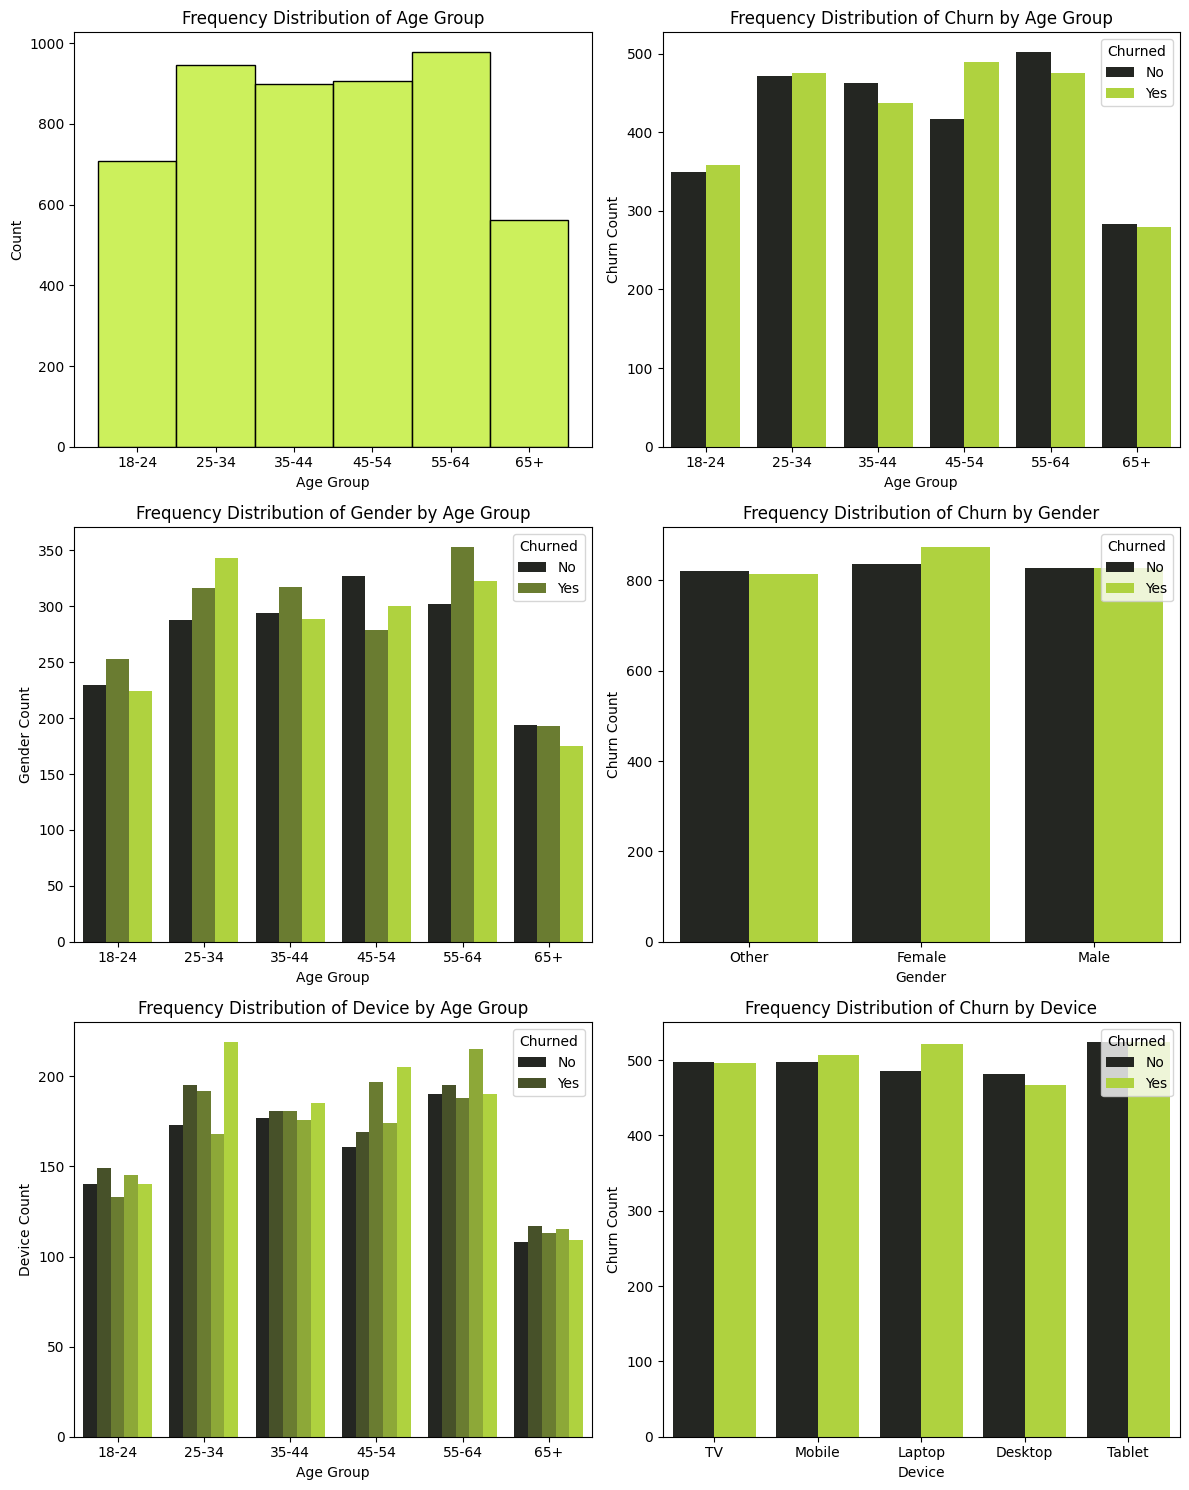

In [11]:
# (1,3) subplots that share the x axis
fig, axes = plt.subplots(3, 2, figsize=(12,15), sharey=False)

sns.histplot(ax=axes[0,0], data=df, x='age_bucket', color="#BCEB26")
axes[0,0].set_title('Frequency Distribution of Age Group')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Count')

sns.countplot(ax=axes[0,1], data = df, x='age_bucket', hue = 'churned', palette='dark:#BCEB26')
axes[0,1].set_title('Frequency Distribution of Churn by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Churn Count')
axes[0,1].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(ax=axes[1,0], data = df, x='age_bucket', hue = 'gender', palette='dark:#BCEB26')
axes[1,0].set_title('Frequency Distribution of Gender by Age Group')
axes[1,0].set_xlabel('Age Group')
axes[1,0].set_ylabel('Gender Count')
axes[1,0].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(ax=axes[1,1], data = df, x='gender', hue = 'churned', palette='dark:#BCEB26')
axes[1,1].set_title('Frequency Distribution of Churn by Gender')
axes[1,1].set_xlabel("Gender")
axes[1,1].set_ylabel('Churn Count')
axes[1,1].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(ax=axes[2,0], data = df.sort_values(by='device'), x='age_bucket', hue = 'device', palette='dark:#BCEB26') 
axes[2,0].set_title('Frequency Distribution of Device by Age Group')
axes[2,0].set_xlabel('Age Group')
axes[2,0].set_ylabel('Device Count')
axes[2,0].legend(title='Churned',labels=['No', 'Yes'])

sns.countplot(ax=axes[2,1], data = df, x='device', hue = 'churned', palette='dark:#BCEB26')
axes[2,1].set_title('Frequency Distribution of Churn by Device')
axes[2,1].set_xlabel('Device')
axes[2,1].set_ylabel('Churn Count')
axes[2,1].legend(title='Churned',labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

On the left-hand side:

**The first graph:** Unexpectedly, the users count for 18-24 age group is significantly lower than other groups (expect from 65+). This maybe due to students' limited ability to pay. 


**The second graph:** The gender distribution is almost even across all age groups.

**The third graph:** Tablet is a more trending device for the younger generations, observed from 25-54, while the senior group (55-64) favors TV. 

On the right-hand side: 

Churned and not-churned users generally balanced throughout `Age Group`, `Gender`, and `Device`. Though, we do observed that age group 45-54 has a higher chance of churning.

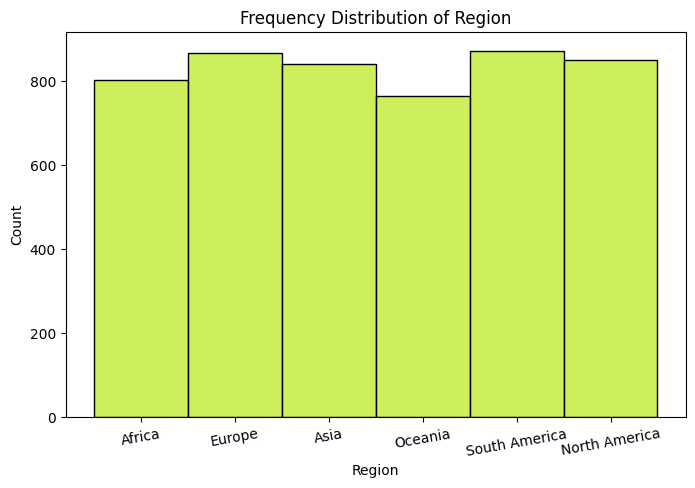

In [12]:
plt.figure(figsize=(8,5))

sns.histplot(data=df, x='region', color='#BCEB26')
plt.title('Frequency Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.show()

The distribution over different regions is also even.

### User behavior
**Related columns:**
- `watch_hours`
- `last_login_days`
- `payment_method`
- `number_of_profiles`
- `avg_watch_time_per_day`
- `favorite_genre`

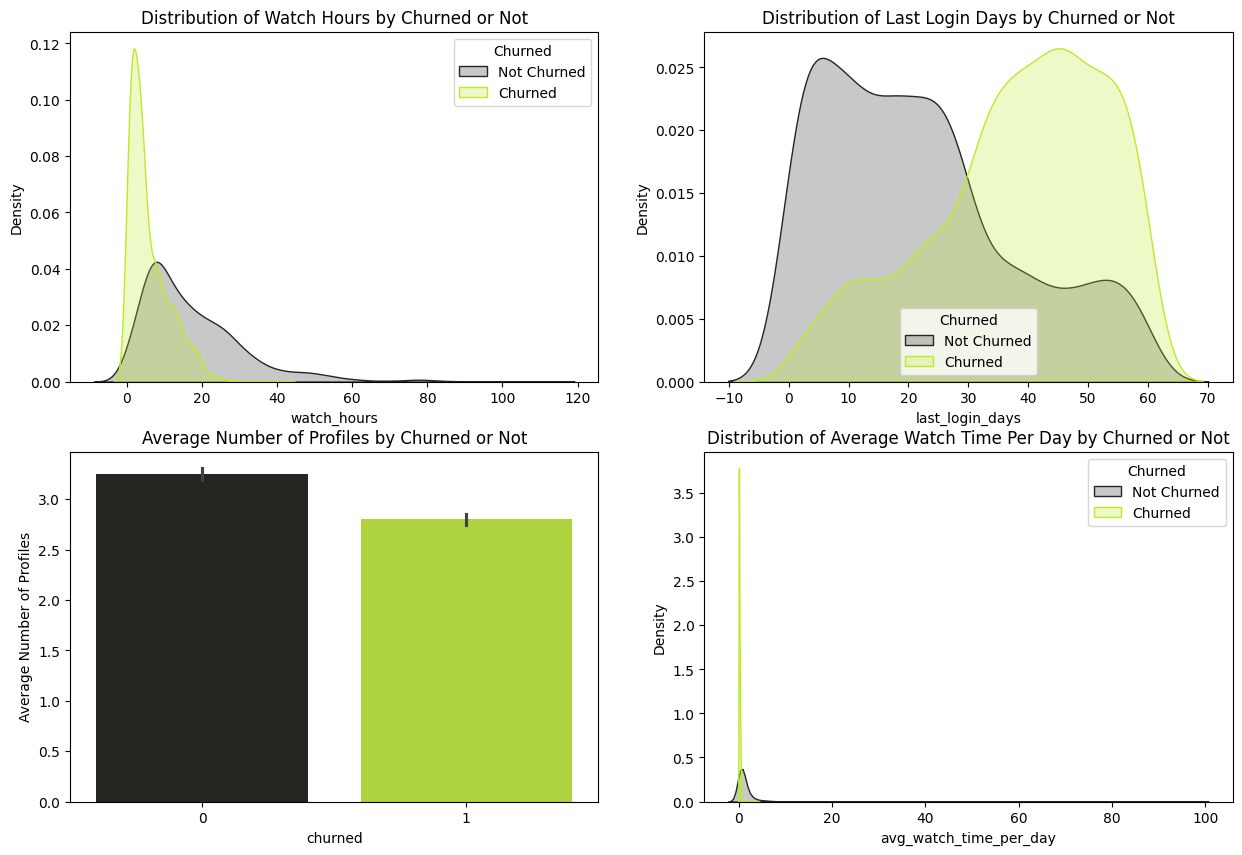

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharey=False)

sns.kdeplot(data=df[df['churned']==0], x='watch_hours', fill=True, label='Not Churned', color='#232622', ax=axes[0,0])
sns.kdeplot(data=df[df['churned']==1], x='watch_hours', fill=True, label='Churned', color='#BCEB26', ax=axes[0,0])
axes[0,0].set_title('Distribution of Watch Hours by Churned or Not')
axes[0,0].set_ylabel('Density') 
axes[0,0].legend(title='Churned')

sns.kdeplot(data=df[df['churned']==0], x='last_login_days', fill=True, label='Not Churned', color='#232622', ax=axes[0,1])
sns.kdeplot(data=df[df['churned']==1], x='last_login_days', fill=True, label='Churned', color='#BCEB26', ax=axes[0,1])
axes[0,1].set_title('Distribution of Last Login Days by Churned or Not')
axes[0,1].set_ylabel('Density') 
axes[0,1].legend(title='Churned')

sns.barplot(ax=axes[1,0], data=df, x='churned', y='number_of_profiles', palette='dark:#BCEB26')
axes[1,0].set_title('Average Number of Profiles by Churned or Not')
axes[1,0].set_ylabel('Average Number of Profiles')

sns.kdeplot(data=df[df['churned']==0], x='avg_watch_time_per_day', fill=True, label='Not Churned', color='#232622', ax=axes[1,1])
sns.kdeplot(data=df[df['churned']==1], x='avg_watch_time_per_day', fill=True, label='Churned', color='#BCEB26', ax=axes[1,1])
axes[1,1].set_title('Distribution of Average Watch Time Per Day by Churned or Not')
axes[1,1].set_ylabel('Density') 
axes[1,1].legend(title='Churned')

The feature `average number of profiles` is not that correlated to whether a user churn or not.

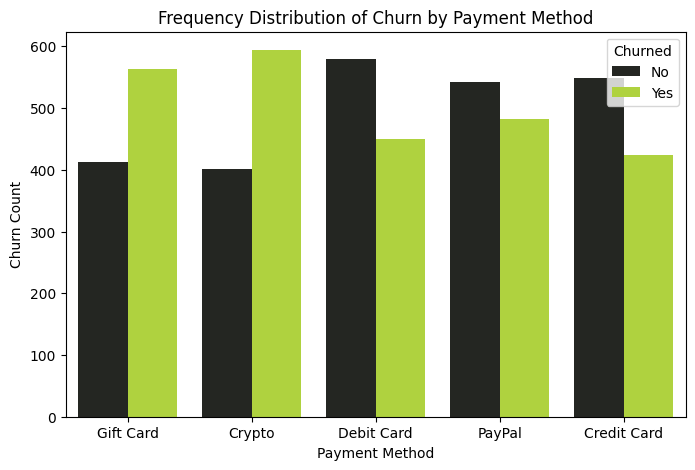

In [14]:
#payment method by churned or not 
plt.figure(figsize=(8,5))
sns.countplot(data = df, x='payment_method', hue = 'churned', palette='dark:#BCEB26')
plt.title('Frequency Distribution of Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Churn Count')
plt.legend(title='Churned',labels=['No', 'Yes'])
plt.show()


The outcome is reasonable. Gift cards and crypto are unstable payment methods, while traditional payments are more stable, leading to less percentage of churning. 

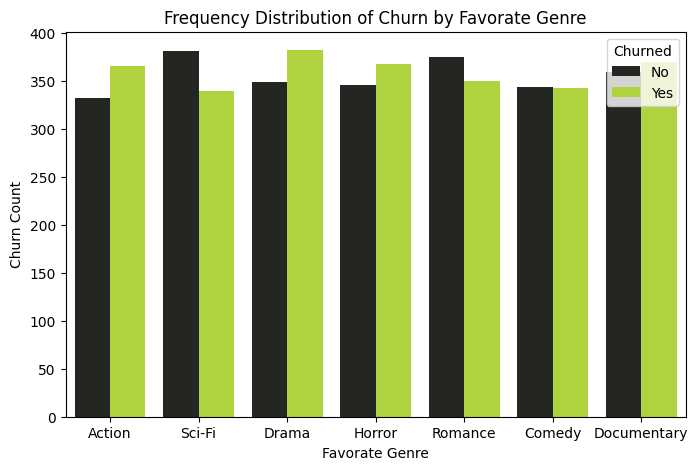

In [15]:
# favorate genre by churned or not 
plt.figure(figsize=(8,5))
sns.countplot(data = df, x='favorite_genre', hue = 'churned', palette='dark:#BCEB26')
plt.title('Frequency Distribution of Churn by Favorate Genre')
plt.xlabel('Favorate Genre')
plt.ylabel('Churn Count')
plt.legend(title='Churned',labels=['No', 'Yes'])
plt.show()

## Customer Churn Model
This section will build up a machine learning model, intended to identify what are the features that churned customers have, try to explain the reason of churn, so that we can predict the potential churns and prevent them. 

### Feature Engineering
The promising features that we have seen in the previous EDA are listed below, and they will be used for modeling. 

**Continutous Variable:** 
- `watch_hours`
- `last_login_days`
- `avg_watch_time_per_day`
- `monthly_fee`

**Categorical Variable:**
- `payment_method`
- `age_bucket`
- `device`

### Random Forest

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler, OneHotEncoder 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

#### Model Data

In [17]:
# categorical features
cat_features = ['payment_method', 'age_bucket', 'device'] 

encoder = OneHotEncoder(sparse_output=False)
encoded_cat = encoder.fit_transform(df[cat_features])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(cat_features)) 

# continuous features
cont_features = ['watch_hours', 'last_login_days', 'avg_watch_time_per_day', 'monthly_fee']

scaler = StandardScaler() 
scaled_cont = scaler.fit_transform(df[cont_features]) 
scaled_df = pd.DataFrame(scaled_cont, columns = cont_features) 

df_data = pd.concat([encoded_df, scaled_df], axis=1)
df_y = df['churned']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_y, test_size = 0.2, random_state=1024) 

#### Fit Model

In [19]:
model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10) 

model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

#### Model Evaluation

In [36]:
y_train_pred = model.predict(X_train)

print("Training Set Evaluation")
print(f"{'='*len('Training Set Evaluation')}")
print(f"Accuracy score: {accuracy_score(y_train, y_train_pred):.2f}") 
print(confusion_matrix(y_train, y_train_pred))

Training Set Evaluation
Accuracy score: 0.97
[[1855  131]
 [   8 2006]]


In [37]:
y_test_pred = model.predict(X_test) 

print("Testing Set Evaluation")
print(f"{'='*len('Testing Set Evaluation')}")

print(f"Accuracy score: {accuracy_score(y_test, y_test_pred): .2f}")
print(confusion_matrix(y_test, y_test_pred))


Testing Set Evaluation
Accuracy score:  0.92
[[442  57]
 [ 26 475]]


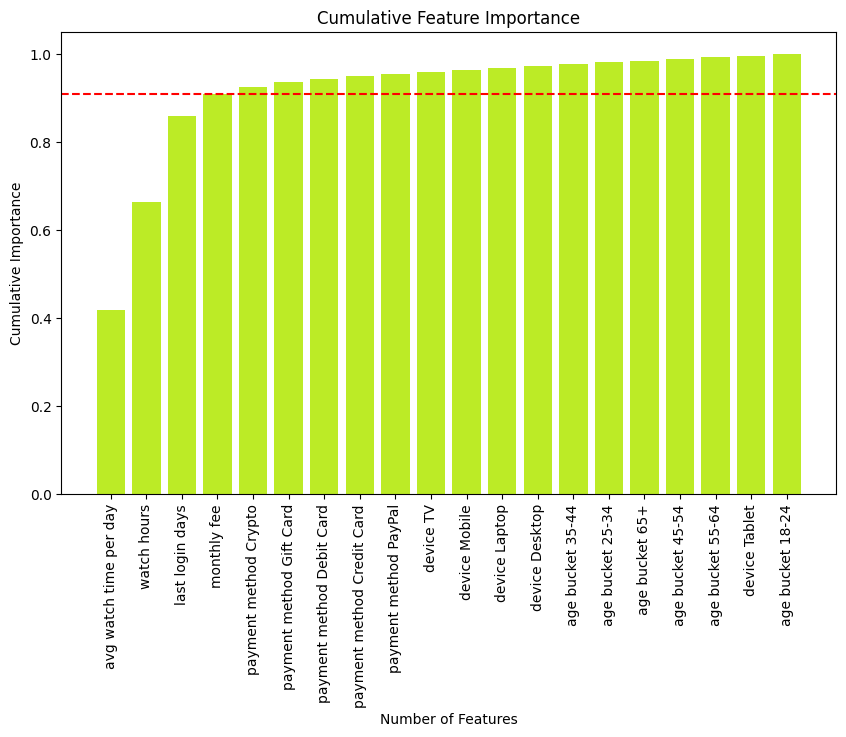

In [ ]:
df_feature_importances = pd.Series(model.feature_importances_, index = df_data.columns)
df_feature_importances = df_feature_importances.sort_values(ascending=False)

cum_importance = np.cumsum(df_feature_importances.values)

plt.figure(figsize=(10,6))
plt.bar(range(len(df_feature_importances.values)), cum_importance, color='#BCEB26')
plt.axhline(y=0.91, color='r', linestyle='--')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
labels = [" ".join(index.split("_")) for index in df_feature_importances.index]
plt.xticks(range(len(df_feature_importances.values)), labels, rotation=90)
plt.ylabel('Cumulative Importance')
plt.show()

### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import learning_curve, StratifiedKFold, cross_val_score 

#### Fit Model

In [99]:
model = LogisticRegression(max_iter=500, penalty="l2", C=1.0) 

cross_val = StratifiedKFold(n_splits=5, shuffle=True, random_state=1024)
scores = cross_val_score(model, X_train, y_train, cv=cross_val)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

model.fit(X_train, y_train)

Cross-validation scores: [0.88125 0.87125 0.87875 0.83875 0.86375]
Mean accuracy: 0.86675


LogisticRegression(max_iter=500)

From the cross validation result, the model is **neither overfitting nor underfitting**, as the training and validation scores are quite close.

In [100]:
print(f"# iteration: {model.n_iter_[0]}")

# iteration: 19


#### Model Evaluation

In [101]:
y_train_pred = model.predict(X_train) 

print("Training Set Evaluation")
print(f"{'='*len('Training Set Evaluation')}")
print(f"Accuracy score: {accuracy_score(y_train, y_train_pred):.2f}") 
print(confusion_matrix(y_train, y_train_pred))

Training Set Evaluation
Accuracy score: 0.87
[[1696  290]
 [ 233 1781]]


In [102]:
y_test_pred = model.predict(X_test) 

print("Testing Set Evaluation")
print(f"{'='*len('Testing Set Evaluation')}")
print(f"Accuracy score: {accuracy_score(y_test, y_test_pred): .2f}")
print(confusion_matrix(y_test, y_test_pred))    

Testing Set Evaluation
Accuracy score:  0.89
[[436  63]
 [ 48 453]]
